In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import fcluster

In [2]:
df = pd.read_csv('Statssurvey.csv')

In [3]:
df.head()

,Timestamp,Your Sex?,Your Matric (grade 12) Average/ GPA (in %),What year were you in last year (2023) ?,What faculty does your degree fall under?,Your 2023 academic year average/GPA in % (Ignore if you are 2024 1st year student),Your Accommodation Status Last Year (2023),Monthly Allowance in 2023,Were you on scholarship/bursary in 2023?,Additional amount of studying (in hrs) per week,How often do you go out partying/socialising during the week?,"On a night out, how many alcoholic drinks do you consume?","How many classes do you miss per week due to alcohol reasons, (i.e: being hungover or too tired?)",How many modules have you failed thus far into your studies?,Are you currently in a romantic relationship?,Do your parents approve alcohol consumption?,How strong is your relationship with your parent/s?
0,2024/03/07 5:12:01 pm EET,Female,76.0,2nd Year,Arts & Social Sciences,72.0,Private accommodation/ stay with family/friends,R 4001- R 5000,No,8+,Only weekends,8+,3,0,Yes,Yes,Very close
1,2024/03/07 5:12:08 pm EET,Male,89.0,2nd Year,Economic & Management Sciences,75.0,Private accommodation/ stay with family/friends,R 7001 - R 8000,"Yes (NSFAS, etc...)",8+,Only weekends,3-5,4+,0,No,Yes,Very close
2,2024/03/07 5:12:25 pm EET,Male,76.0,1st Year,AgriSciences,55.0,Private accommodation/ stay with family/friends,R 4001- R 5000,No,3-5,2,8+,3,0,No,Yes,Very close
3,2024/03/07 5:12:28 pm EET,Male,89.0,2nd Year,Engineering,84.0,Private accommodation/ stay with family/friends,R 6001 - R 7000,No,3-5,3,8+,2,0,Yes,Yes,Very close
4,2024/03/07 5:13:00 pm EET,Female,74.0,2nd Year,Arts & Social Sciences,52.0,Private accommodation/ stay with family/friends,R 4001- R 5000,No,3-5,Only weekends,5-8,1,3,No,Yes,Fair


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406 entries, 0 to 405
Data columns (total 17 columns):
 #   Column                                                                                             Non-Null Count  Dtype  
---  ------                                                                                             --------------  -----  
 0   Timestamp                                                                                          406 non-null    object 
 1   Your Sex?                                                                                          404 non-null    object 
 2   Your Matric (grade 12) Average/ GPA (in %)                                                         399 non-null    float64
 3   What year were you in last year (2023) ?                                                           333 non-null    object 
 4   What faculty does your degree fall under?                                                          399 non-null    object 

In [5]:
df.dropna(axis=0, inplace=True)
df.drop(columns=['Timestamp','Your 2023 academic year average/GPA in % (Ignore if you are 2024 1st year student)'],inplace=True)

In [6]:
numeric_df = df.select_dtypes(include='number')
categorical_df = df.select_dtypes(exclude='number')

**EDA**

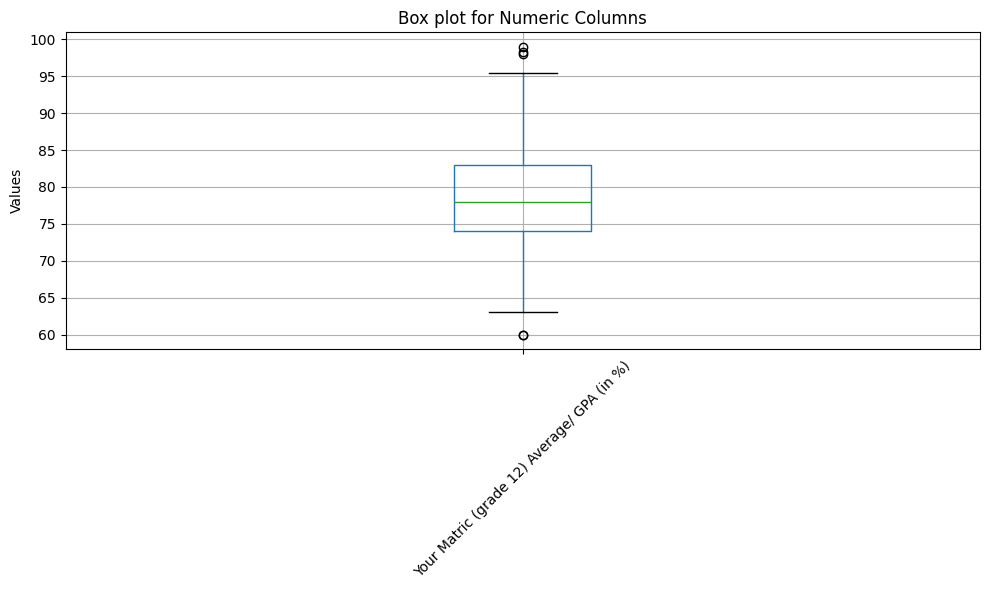

In [7]:
numeric_df.boxplot(figsize=(10, 6))  # Adjust figsize as needed
plt.title('Box plot for Numeric Columns')
plt.ylabel('Values')
plt.xticks(rotation=45)  
plt.tight_layout()  
plt.show()

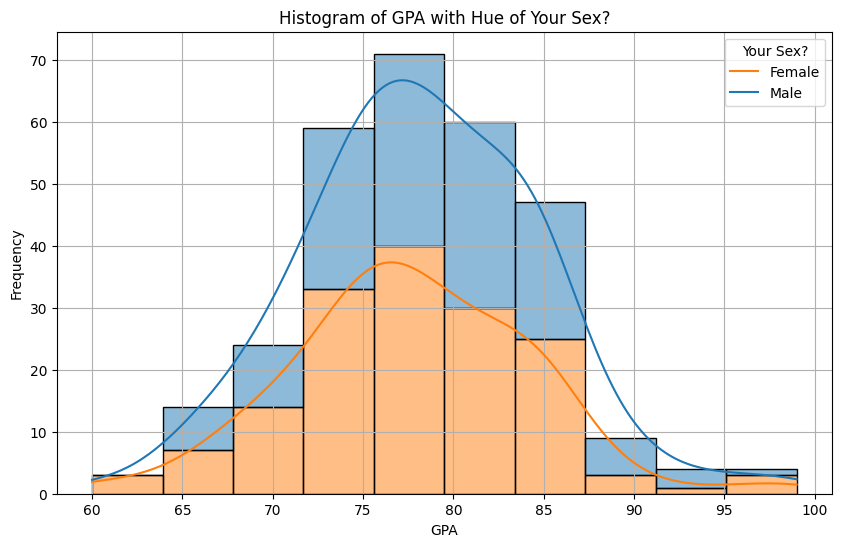

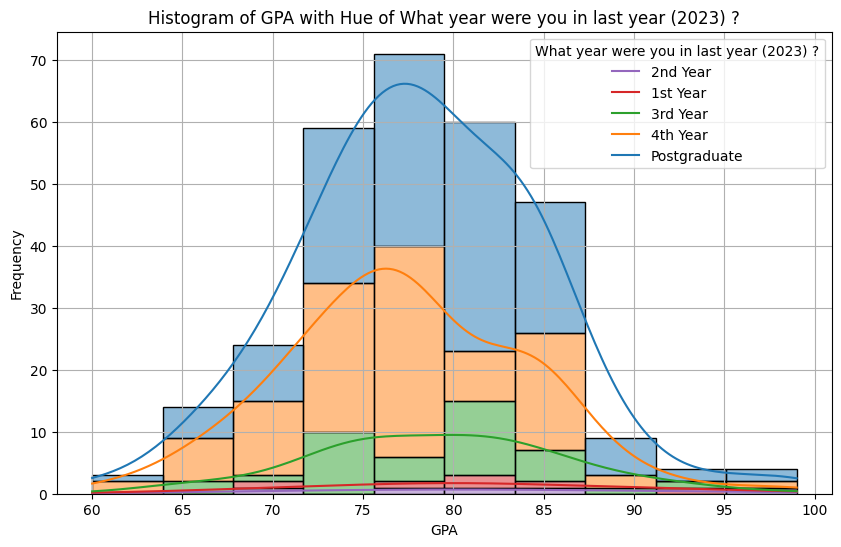

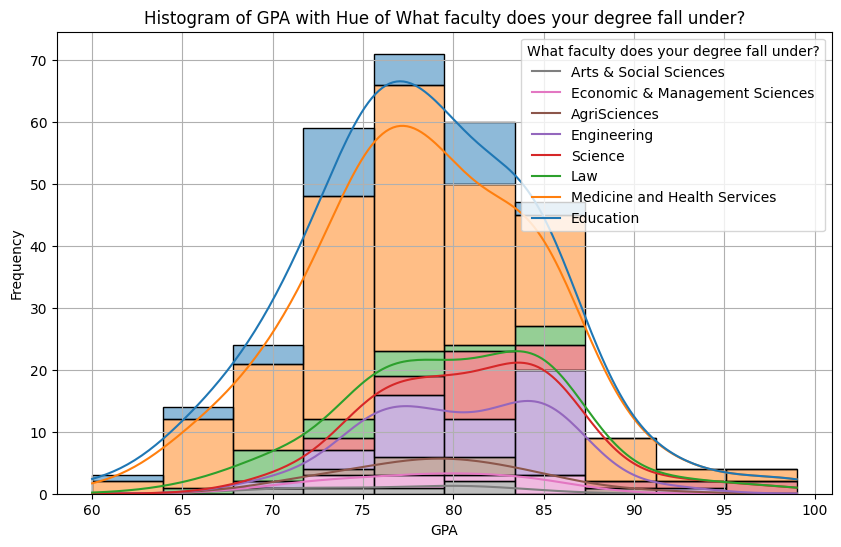

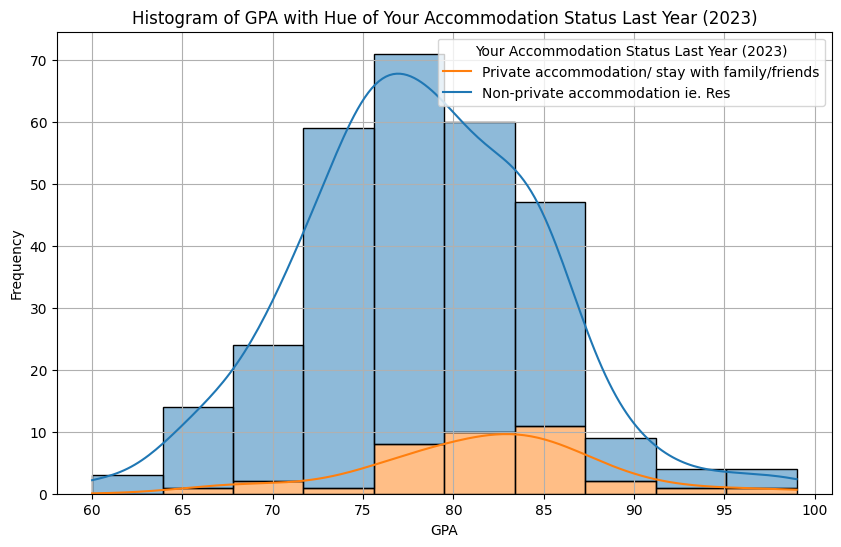

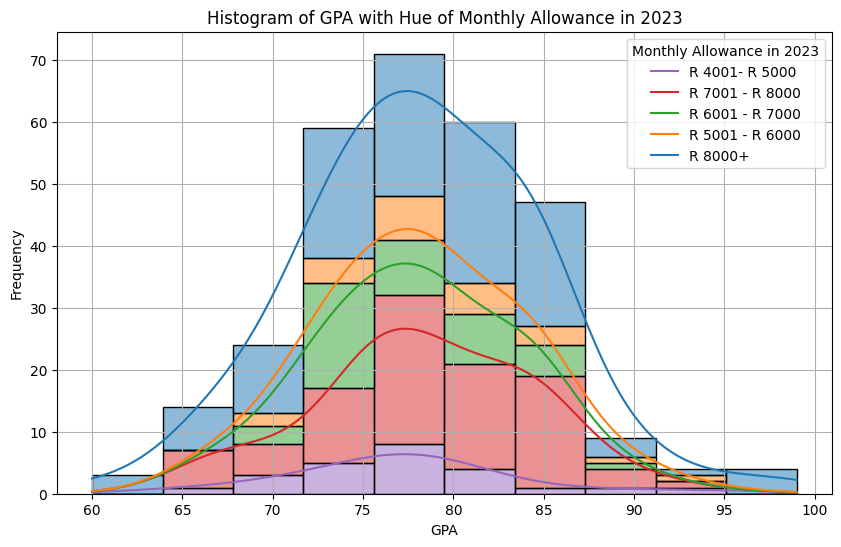

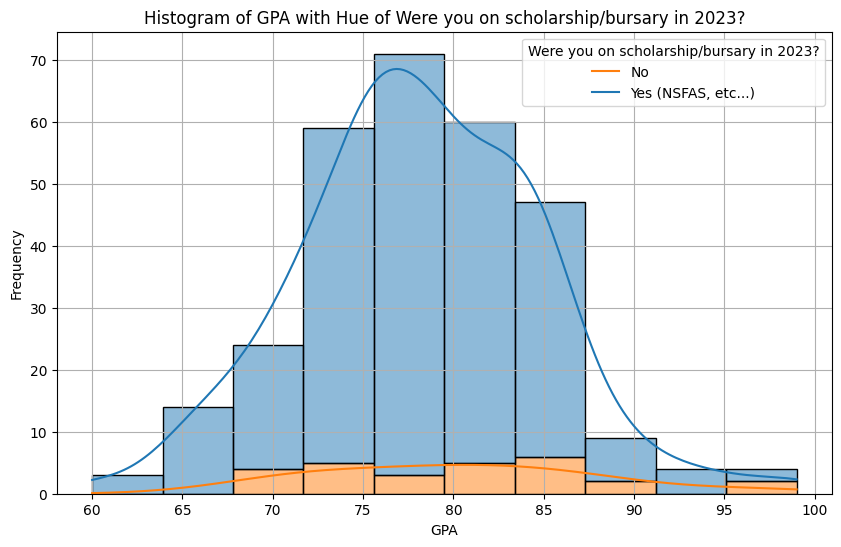

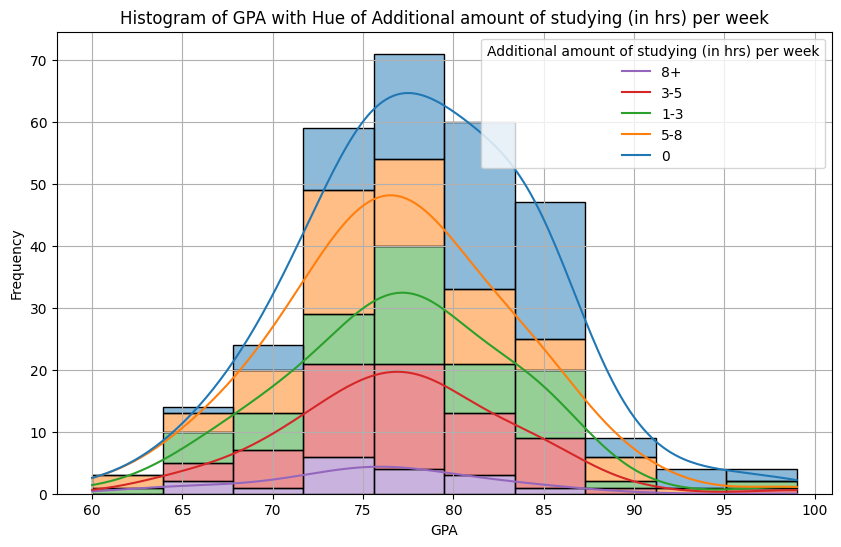

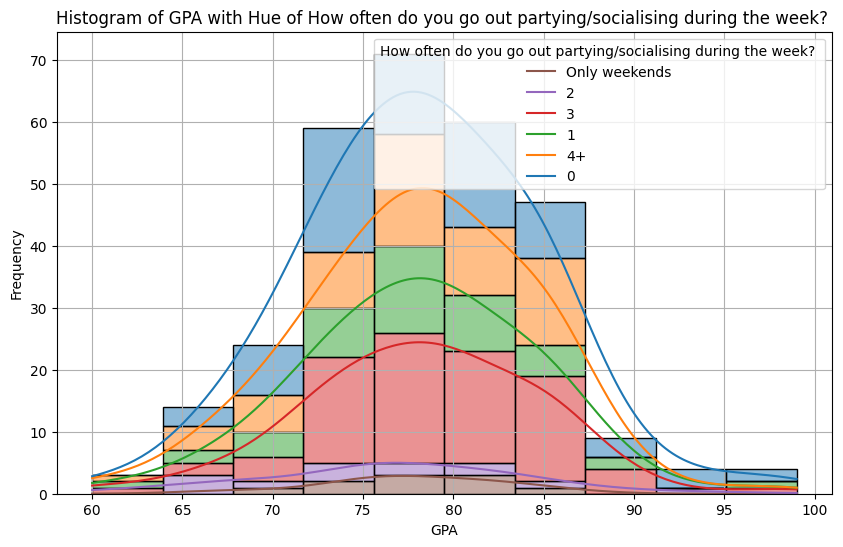

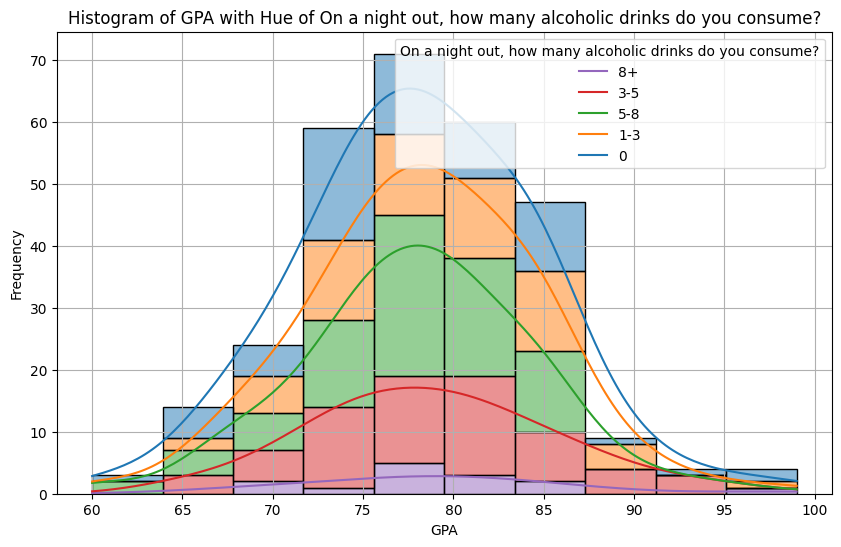

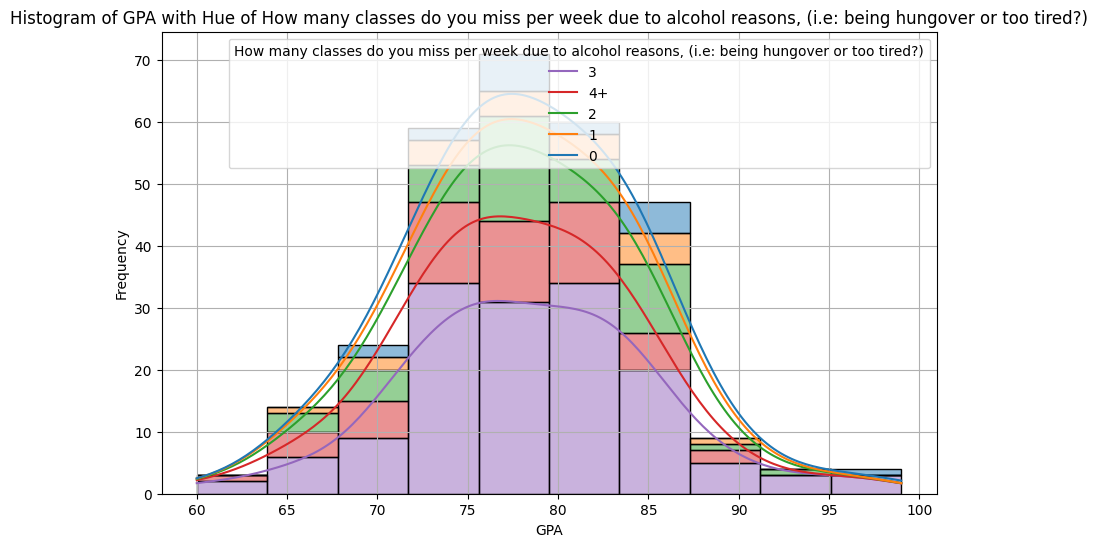

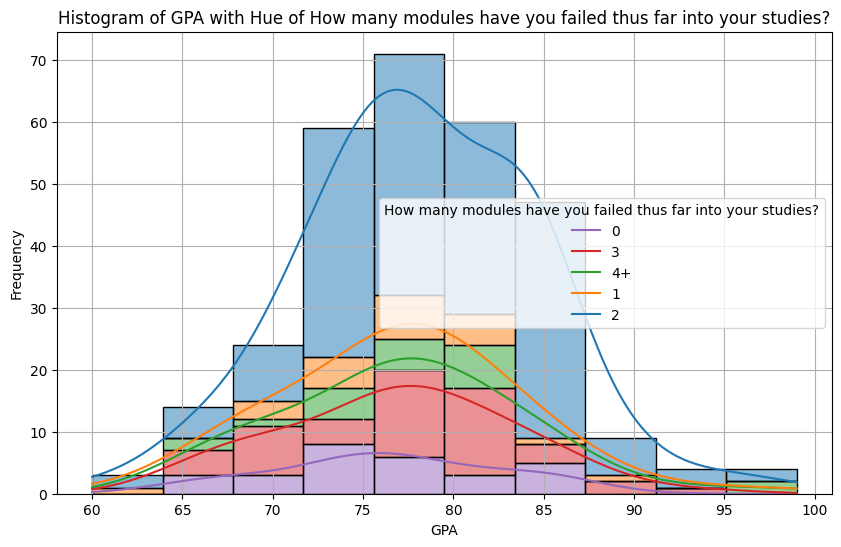

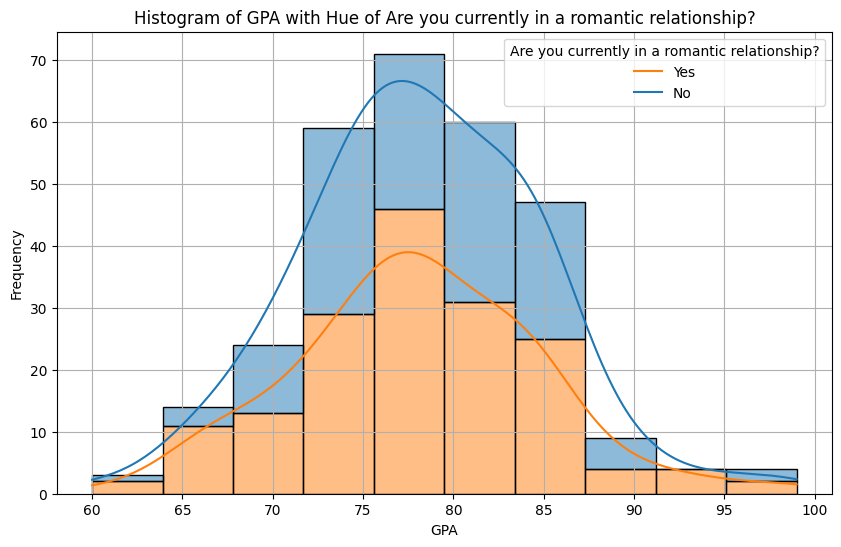

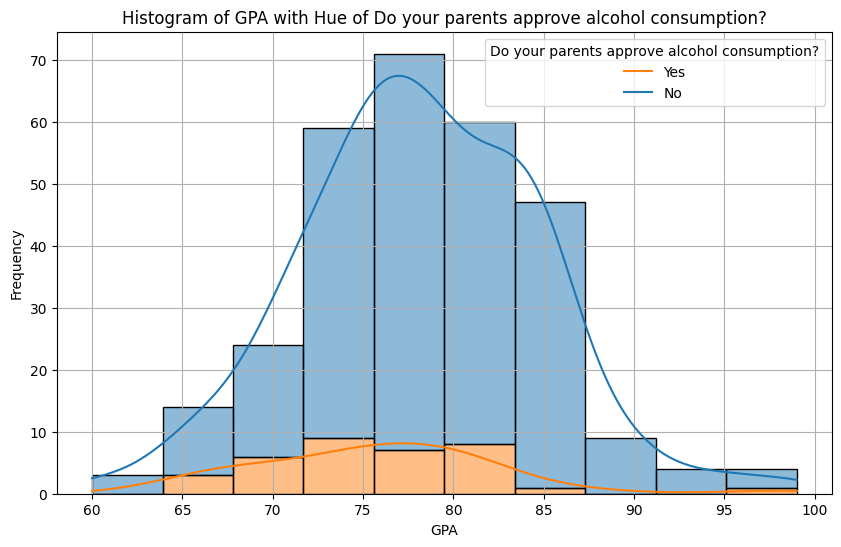

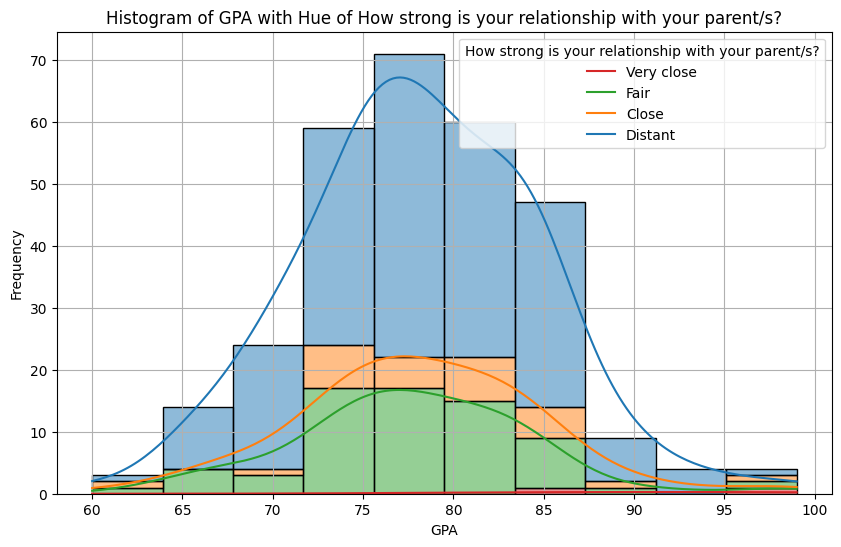

In [8]:
df_dummy = pd.concat([numeric_df, categorical_df], axis=1)

for col in categorical_df.columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(data=df_dummy, x='Your Matric (grade 12) Average/ GPA (in %)', hue=col, multiple='stack', bins=10, alpha=0.5, kde=True)
    plt.title(f'Histogram of GPA with Hue of {col}')
    plt.xlabel('GPA')
    plt.ylabel('Frequency')
    plt.legend(title=col, labels=categorical_df[col].unique())
    plt.grid(True)
    plt.show()

1) private residence have a higher mean of GPA
2) droping the column "Were you on scholarship/bursary in 2023?" because of lack of "No" catogary and a lack of direct influence in GPA.

In [9]:
categorical_df.drop(columns=['Were you on scholarship/bursary in 2023?'],inplace=True)

Encoding

In [10]:
bins = [0, 74, 78, 83, 99]  
categorical_df['GPA Category'] = pd.cut(numeric_df['Your Matric (grade 12) Average/ GPA (in %)'], bins=bins, labels=['Low', 'Medium', 'High', 'Very High'])

croping the dataframe into the important columns for clustering.

In [11]:
target_df = categorical_df[['GPA Category','How many classes do you miss per week due to alcohol reasons, (i.e: being hungover or too tired?)',
                              'On a night out, how many alcoholic drinks do you consume?','How often do you go out partying/socialising during the week? ']]

In [12]:
df_encoded = pd.get_dummies(target_df)

**Clustering**

elbow method

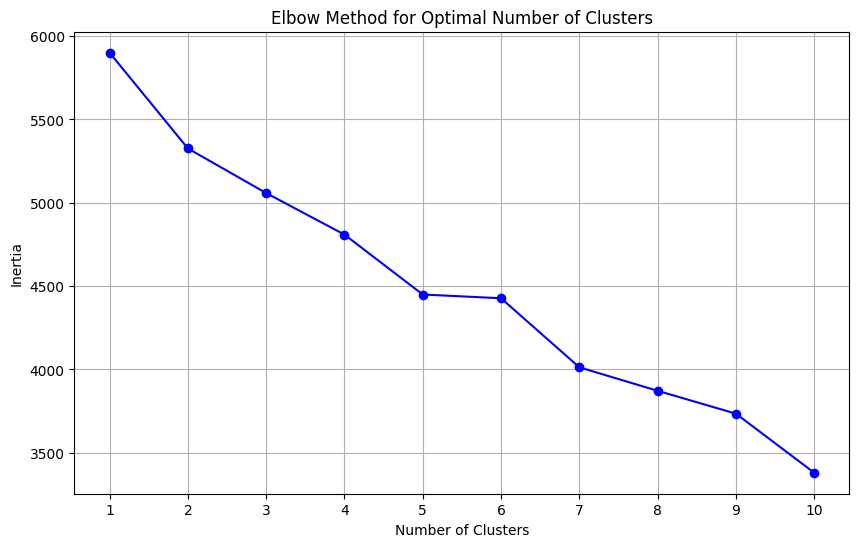

In [13]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_encoded)

inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o', linestyle='-', color='b')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

the graph dosnt form an elbow thus kmenas cant be used.

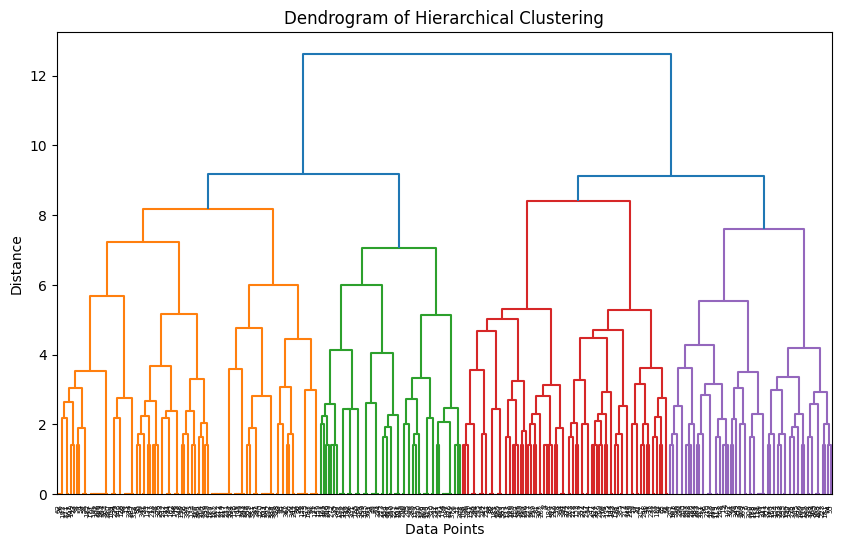

In [14]:
linked = linkage(df_encoded, method='ward')


plt.figure(figsize=(10, 6))
dendrogram(linked, orientation='top', labels=categorical_df.index, distance_sort='descending', show_leaf_counts=True)
plt.title('Dendrogram of Hierarchical Clustering')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()

    the dendrogram has clustered the data more evenly with ward distance mesure.
    from the dendrogram the number of clusters is 4.

In [15]:
cluster_labels = fcluster(linked, 4, criterion='maxclust')

target_df['Cluster_hierarchy_4'] = cluster_labels

C:\Users\noobj\AppData\Local\Temp\ipykernel_28580\2588395481.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_df['Cluster_hierarchy_4'] = cluster_labels


C:\Users\noobj\AppData\Local\Temp\ipykernel_28580\1603941822.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data = target_df.groupby(['Cluster_hierarchy_4', column]).size().unstack(fill_value=0)


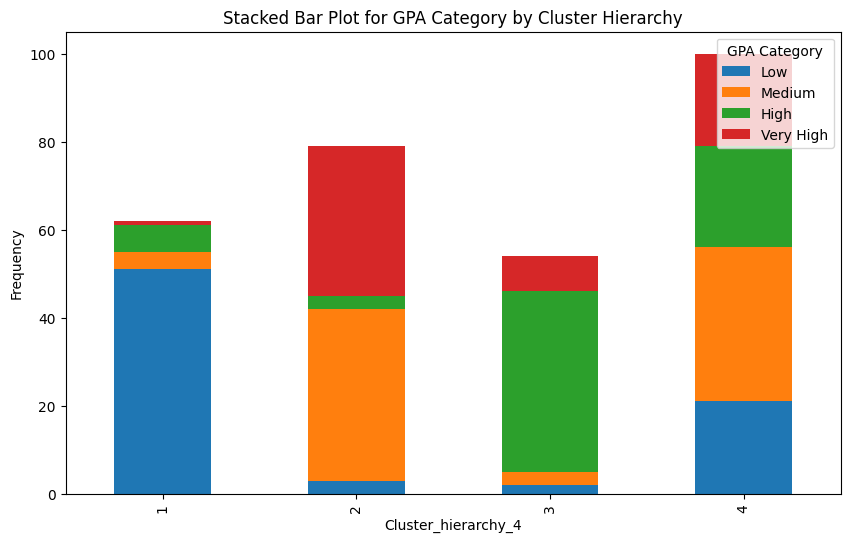

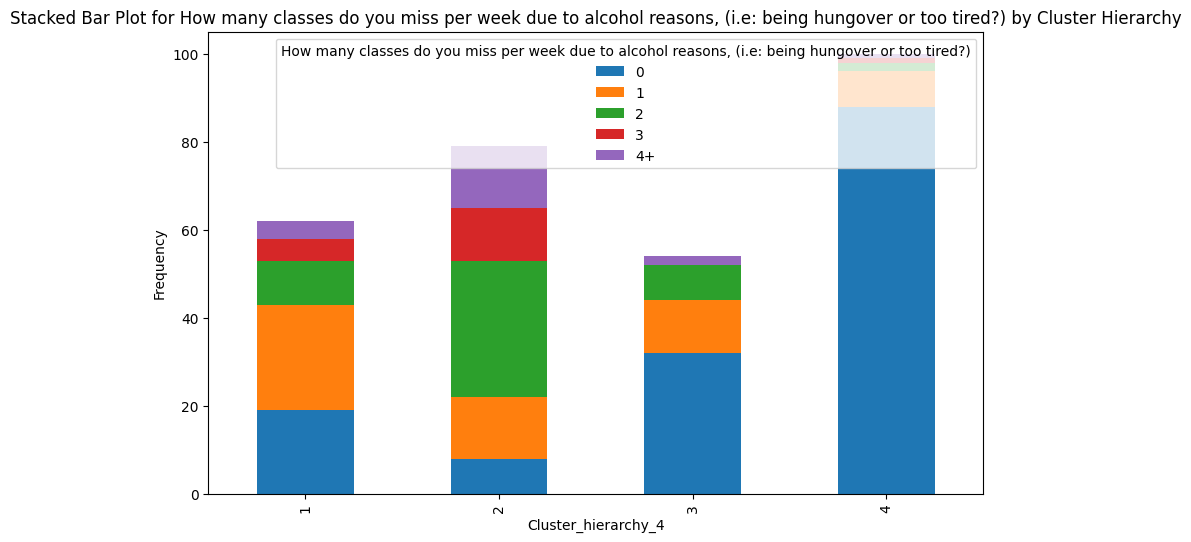

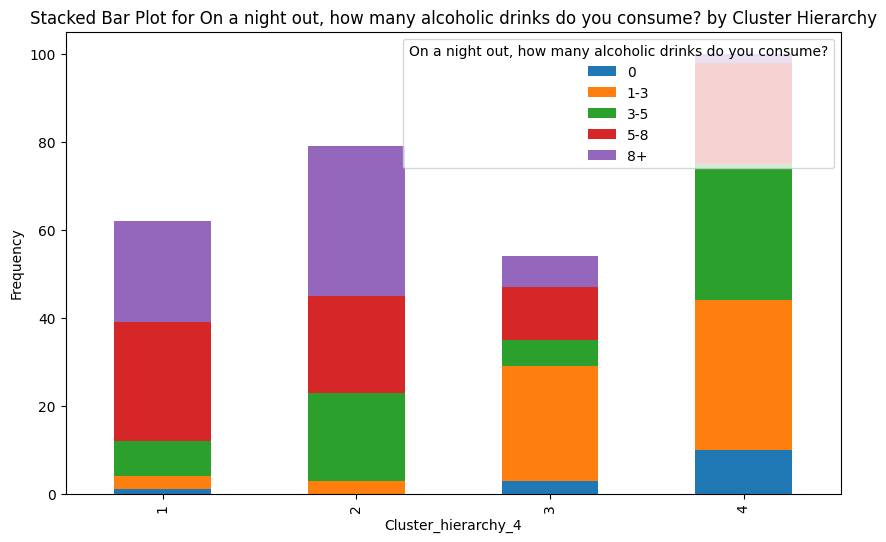

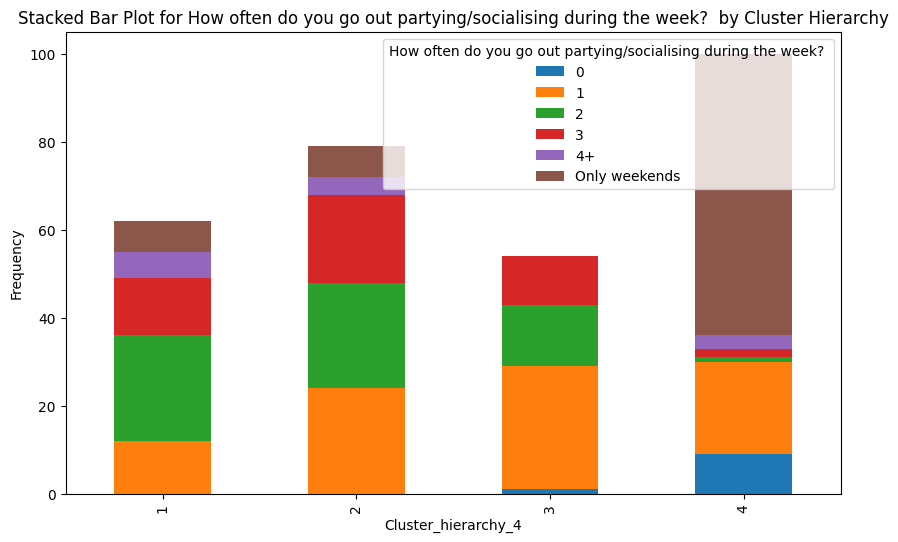

In [16]:
for column in target_df.columns:
    if column != 'Cluster_hierarchy_4':
        # Calculate frequency of values for each cluster label
        data = target_df.groupby(['Cluster_hierarchy_4', column]).size().unstack(fill_value=0)
        
        # Plot stacked bar chart
        data.plot(kind='bar', stacked=True, figsize=(10, 6))
        plt.title(f'Stacked Bar Plot for {column} by Cluster Hierarchy')
        plt.xlabel('Cluster_hierarchy_4')
        plt.ylabel('Frequency')
        plt.legend(title=column, loc='upper right')
        plt.show()

In [17]:
target_df.groupby(by='Cluster_hierarchy_4').describe()

GPA Category                      \
                           count unique     top freq   
Cluster_hierarchy_4                                    
1                             62      4     Low   51   
2                             79      4  Medium   39   
3                             54      4    High   41   
4                            100      4  Medium   35   

                    How many classes do you miss per week due to alcohol reasons, (i.e: being hungover or too tired?)  \
                                                                                                                count   
Cluster_hierarchy_4                                                                                                     
1                                                                   62                                                  
2                                                                   79                                                  
3                                                                   54                                                  
4                                                                  100                                                  

                                     \
                    unique top freq   
Cluster_hierarchy_4                   
1                        5   1   24   
2                        5   2   31   
3                        4   0   32   
4                        5   0   88   

                    On a night out, how many alcoholic drinks do you consume?  \
                                                                        count   
Cluster_hierarchy_4                                                             
1                                                                   62          
2                                                                   79          
3                                                                   54          
4                                                                  100          

                                      \
                    unique  top freq   
Cluster_hierarchy_4                    
1                        5  5-8   27   
2                        4   8+   34   
3                        5  1-3   26   
4                        5  1-3   34   

                    How often do you go out partying/socialising during the week?   \
                                                                             count   
Cluster_hierarchy_4                                                                  
1                                                                   62               
2                                                                   79               
3                                                                   54               
4                                                                  100               

                                                
                    unique            top freq  
Cluster_hierarchy_4                             
1                        5              2   24  
2                        5              2   24  
3                        4              1   28  
4                        6  Only weekends   64

    infrences:
    1: low gpa, high drinks
    2: high miss, high drinks, high party
    3: high gpa, low drinks, high party
    4: low miss, low party


    target clusters:
    1: students who get low gpa due to alcaholic reason.
    2: students who strugle with alcaho in general.

In [18]:
target_df.to_csv('final.csv')

    Solutions:
    --> students of cluster 1 need to stop alcohol cunsumption and focus on there studies more.
    --> students on cluster 2 should substitute alcohol with other stimulating activitys.